# Оценка качества обучения нейронной сети в Keras

На примере распознаванию рукописных цифр из **набора данных MNIST**.

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from tensorflow.keras.optimizers import Adam, RMSprop

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [2]:
# В Keras встроены средства работы с популярными наборами данных
# x_train_org - изображения из набора данных для обучения
# y_train_org - правильные ответы (метки) к набору данных для обучения
# x_test_org - изображения из набора данных для тестирования
# y_test_org - правильные ответы (метки) к набору данных для тестирования
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


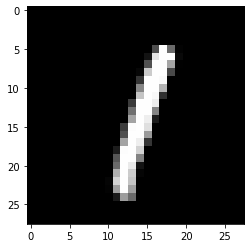

In [3]:
n = 5
plt.imshow(Image.fromarray(x_test_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [4]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [5]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train.astype('float32')
x_train = x_train / 255 
x_test = x_test.astype('float32')
x_test = x_test / 255 

**Работа с правильными ответами**

In [6]:
print(y_test_org[n])

1


**Преобразуем метки в формат one hot encoding**

In [7]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Правильный ответ в формате one hot encoding**

In [8]:
print(y_test[n])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [10]:
model = Sequential()

**Добавляем уровни сети**

Архитектуру сети взяли по ссылке - https://en.wikipedia.org/wiki/MNIST_database


In [11]:
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [13]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=10,
                    verbose=1)

Epoch 1/10
300/300 [==============================] - 3s 4ms/step - loss: 0.2780 - accuracy: 0.9208
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1080 - accuracy: 0.9688
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0698 - accuracy: 0.9802
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0499 - accuracy: 0.9857
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0357 - accuracy: 0.9897
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0269 - accuracy: 0.9927
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0193 - accuracy: 0.9952
Epoch 8/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0142 - accuracy: 0.9969
Epoch 9/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0105 - accuracy: 0.9975
Epoch 10/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0078 - accuracy: 0.9987

## Проверяем качество обучения на тестовом наборе данных

In [14]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.9821


In [15]:
scores

[0.06297782063484192, 0.9821000099182129]

In [16]:
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

Доля верных ответов на тестовых данных, в процентах: 98.21%


#Проверочная выборка

In [17]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(100, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
240/240 [==============================] - 1s 5ms/step - loss: 0.4991 - accuracy: 0.8678 - val_loss: 0.2512 - val_accuracy: 0.9320
Epoch 2/10
240/240 [==============================] - 1s 4ms/step - loss: 0.2267 - accuracy: 0.9375 - val_loss: 0.1943 - val_accuracy: 0.9465
Epoch 3/10
240/240 [==============================] - 1s 4ms/step - loss: 0.1705 - accuracy: 0.9519 - val_loss: 0.1603 - val_accuracy: 0.9554
Epoch 4/10
240/240 [==============================] - 1s 4ms/step - loss: 0.1380 - accuracy: 0.9609 - val_loss: 0.1408 - val_accuracy: 0.9607
Epoch 5/10
240/240 [==============================] - 1s 4ms/step - loss: 0.1149 - accuracy: 0.9674 - val_loss: 0.1275 - val_accuracy: 0.9650
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0989 - accuracy: 0.9718 - val_loss: 0.1190 - val_accuracy: 0.9668
Epoch 7/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0864 - accuracy: 0.9750 - val_loss: 0.1129 - val_accuracy: 0.9674
Epoch 

In [18]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

nVal = 40000

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=10,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

Epoch 1/10
200/200 [==============================] - 2s 7ms/step - loss: 0.3341 - accuracy: 0.9063 - val_loss: 0.1934 - val_accuracy: 0.9434
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.1344 - accuracy: 0.9613 - val_loss: 0.1355 - val_accuracy: 0.9601
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0872 - accuracy: 0.9750 - val_loss: 0.1111 - val_accuracy: 0.9666
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0617 - accuracy: 0.9821 - val_loss: 0.1015 - val_accuracy: 0.9707
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0452 - accuracy: 0.9877 - val_loss: 0.0924 - val_accuracy: 0.9729
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0337 - accuracy: 0.9912 - val_loss: 0.0876 - val_accuracy: 0.9740
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0230 - accuracy: 0.9949 - val_loss: 0.0841 - val_accuracy: 0.9744
Epoch 

## Визуализация качества обучения


Состав словаря History

In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Печатаем значения ошибки на обучающем наборе данных

In [20]:
history.history['loss']

[0.33411744236946106,
 0.1344173550605774,
 0.08717598766088486,
 0.06166338548064232,
 0.04522345960140228,
 0.0336640439927578,
 0.023030590265989304,
 0.019020497798919678,
 0.013445256277918816,
 0.010063252411782742]

Печатаем долю неверных ответов на проверочном наборе данных

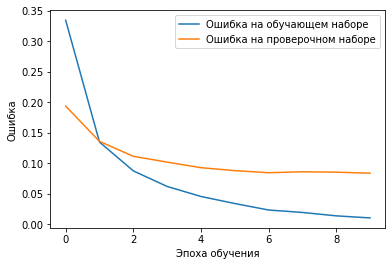

In [21]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

#Переобучение
**Без Dropout**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.3744 - accuracy: 0.0500 - val_loss: 54.0112 - val_accuracy: 0.3165
Epoch 2/10
1/1 [==============================] - 1s 870ms/step - loss: 35.3606 - accuracy: 0.4600 - val_loss: 56.9282 - val_accuracy: 0.2015
Epoch 3/10
1/1 [==============================] - 1s 869ms/step - loss: 51.9848 - accuracy: 0.3300 - val_loss: 40.8131 - val_accuracy: 0.2998
Epoch 4/10
1/1 [==============================] - 1s 869ms/step - loss: 40.8434 - accuracy: 0.4500 - val_loss: 27.3987 - val_accuracy: 0.2393
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 23.7033 - accuracy: 0.3700 - val_loss: 6.4819 - val_accuracy: 0.4669
Epoch 6/10
1/1 [==============================] - 1s 877ms/step - loss: 3.4092 - accuracy: 0.6900 - val_loss: 14.4932 - val_accuracy: 0.3844
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 4.8918 - accuracy: 0.6200 - val_loss: 12.9623 - val_accuracy: 0.4509
Epoch 8/10
1/1 [===

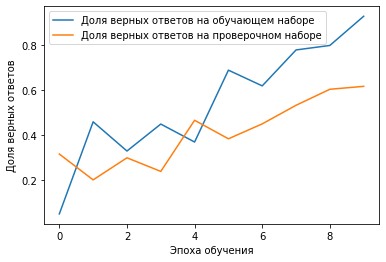

In [22]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=10,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Dropout 30%**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.2520 - accuracy: 0.1800 - val_loss: 27.7385 - val_accuracy: 0.2230
Epoch 2/10
1/1 [==============================] - 1s 879ms/step - loss: 18.9719 - accuracy: 0.3100 - val_loss: 48.5903 - val_accuracy: 0.3785
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 49.4022 - accuracy: 0.4800 - val_loss: 43.7029 - val_accuracy: 0.4384
Epoch 4/10
1/1 [==============================] - 1s 883ms/step - loss: 39.1962 - accuracy: 0.5100 - val_loss: 31.1144 - val_accuracy: 0.4041
Epoch 5/10
1/1 [==============================] - 1s 862ms/step - loss: 18.1212 - accuracy: 0.6300 - val_loss: 19.9159 - val_accuracy: 0.3655
Epoch 6/10
1/1 [==============================] - 1s 861ms/step - loss: 8.2516 - accuracy: 0.6200 - val_loss: 9.1768 - val_accuracy: 0.5350
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 1.5401 - accuracy: 0.8600 - val_loss: 10.1986 - val_accuracy: 0.5234
Epoch 8/10
1/1 [===

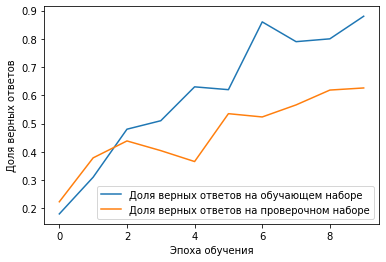

In [23]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.3))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=10,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Dropout 80%**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.6600 - accuracy: 0.0800 - val_loss: 23.8135 - val_accuracy: 0.2139
Epoch 2/10
1/1 [==============================] - 1s 887ms/step - loss: 28.9695 - accuracy: 0.2900 - val_loss: 43.0802 - val_accuracy: 0.2021
Epoch 3/10
1/1 [==============================] - 1s 895ms/step - loss: 42.7614 - accuracy: 0.3000 - val_loss: 22.9218 - val_accuracy: 0.2862
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 31.5114 - accuracy: 0.3000 - val_loss: 11.7404 - val_accuracy: 0.3805
Epoch 5/10
1/1 [==============================] - 1s 876ms/step - loss: 18.8809 - accuracy: 0.4200 - val_loss: 11.7754 - val_accuracy: 0.4713
Epoch 6/10
1/1 [==============================] - 1s 896ms/step - loss: 10.0838 - accuracy: 0.6100 - val_loss: 10.2005 - val_accuracy: 0.5185
Epoch 7/10
1/1 [==============================] - 1s 872ms/step - loss: 7.4785 - accuracy: 0.5500 - val_loss: 8.9290 - val_accuracy: 0.5442
Epoch 8/10
1/1 

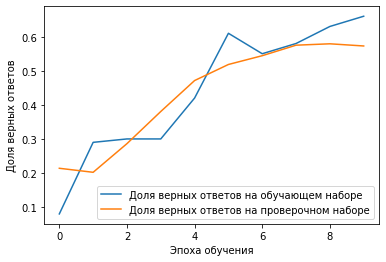

In [24]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.8))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=10,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Dropout 10%**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.3394 - accuracy: 0.1100 - val_loss: 34.9408 - val_accuracy: 0.3363
Epoch 2/10
1/1 [==============================] - 1s 869ms/step - loss: 20.5114 - accuracy: 0.4500 - val_loss: 56.3659 - val_accuracy: 0.2821
Epoch 3/10
1/1 [==============================] - 1s 863ms/step - loss: 53.2111 - accuracy: 0.3500 - val_loss: 39.1623 - val_accuracy: 0.3605
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 30.8099 - accuracy: 0.4500 - val_loss: 29.4296 - val_accuracy: 0.3415
Epoch 5/10
1/1 [==============================] - 1s 886ms/step - loss: 16.2683 - accuracy: 0.5800 - val_loss: 14.8756 - val_accuracy: 0.4776
Epoch 6/10
1/1 [==============================] - 1s 880ms/step - loss: 6.2372 - accuracy: 0.6900 - val_loss: 15.7214 - val_accuracy: 0.5100
Epoch 7/10
1/1 [==============================] - 1s 861ms/step - loss: 3.1016 - accuracy: 0.7800 - val_loss: 13.6364 - val_accuracy: 0.5322
Epoch 8/10
1/1 

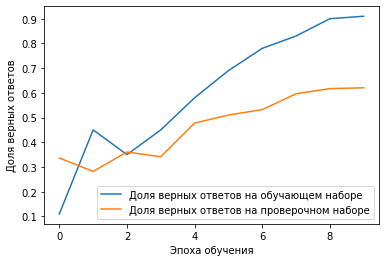

In [25]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.1))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=10,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Активационные функции

Epoch 1/10
240/240 [==============================] - 3s 10ms/step - loss: 1.9850 - accuracy: 0.6694 - val_loss: 1.7029 - val_accuracy: 0.8217
Epoch 2/10
240/240 [==============================] - 1s 4ms/step - loss: 1.5208 - accuracy: 0.8716 - val_loss: 1.3398 - val_accuracy: 0.9072
Epoch 3/10
240/240 [==============================] - 1s 4ms/step - loss: 1.2031 - accuracy: 0.9089 - val_loss: 1.0611 - val_accuracy: 0.9193
Epoch 4/10
240/240 [==============================] - 1s 5ms/step - loss: 0.9604 - accuracy: 0.9202 - val_loss: 0.8527 - val_accuracy: 0.9257
Epoch 5/10
240/240 [==============================] - 1s 4ms/step - loss: 0.7797 - accuracy: 0.9258 - val_loss: 0.6998 - val_accuracy: 0.9295
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.6473 - accuracy: 0.9293 - val_loss: 0.5885 - val_accuracy: 0.9321
Epoch 7/10
240/240 [==============================] - 1s 4ms/step - loss: 0.5497 - accuracy: 0.9334 - val_loss: 0.5073 - val_accuracy: 0.9336
Epoch

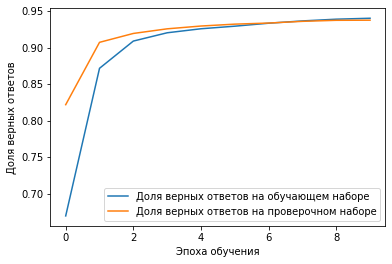

In [33]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(100, input_dim=784, activation="softmax"))
#model.add(Dropout(0.2))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Усреднение точности сети по нескольким итерациям

In [34]:
valAcc = []
iterations = 10

for i in range(iterations):
  model = Sequential()

  # Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
  model.add(Dense(10, input_dim=784, activation="relu"))
  #model.add(Dropout(0.2))
  # Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
  model.add(Dense(10, activation="softmax"))

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  history = model.fit(x_train, 
                      y_train, 
                      batch_size=200, 
                      epochs=5,
                      validation_split=0.2,
                      verbose=0)
  
  currAcc = history.history['val_accuracy'][-1]
  valAcc.append(currAcc)
  print("Запуск", i, "точность", currAcc)
  

Запуск 0 точность 0.9145833253860474
Запуск 1 точность 0.9255833625793457
Запуск 2 точность 0.9236666560173035
Запуск 3 точность 0.9230833053588867
Запуск 4 точность 0.918916642665863
Запуск 5 точность 0.9226666688919067
Запуск 6 точность 0.9175000190734863
Запуск 7 точность 0.922249972820282
Запуск 8 точность 0.9258333444595337
Запуск 9 точность 0.9175000190734863


In [35]:
valAcc = np.array(valAcc)
meanAcc = sum(valAcc) / valAcc.shape[0]
print(meanAcc)
print(max(valAcc) - min(valAcc))

0.9211583316326142
0.011250019073486328


#Запуск нескольких сетей

In [38]:
def evaluateModel(model, batchSize, epohs, valSplit):
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  history = model.fit(x_train, 
                      y_train, 
                      batch_size=batchSize, 
                      epochs=epohs,
                      validation_split=valSplit,
                      verbose=0)
  
  currAcc = history.history['val_accuracy'][-1]
  
  return currAcc, history

In [39]:
models = []

model = Sequential()
model.add(Dense(10, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(20, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(30, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

batchSisez = [100, 200, 300]

acc = []
hist = []
for i in range(len(models)):
  currAcc, currHistory = evaluateModel(models[i], batchSisez[i], 5, 0.2)
  acc.append(currAcc)
  hist.append(currHistory)
  
print(acc)


[0.9270833134651184, 0.9388333559036255, 0.9461666941642761]


In [40]:
print(hist[0].history['val_accuracy'])

[0.8957499861717224, 0.918749988079071, 0.9236666560173035, 0.9260833263397217, 0.9270833134651184]
